# Exploratory Data Analysis Charts

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Import

In [2]:
sf = pd.read_csv('data_files/sf_clean.csv')

In [3]:
# Reformatting hood_district names
sf['hood_district'] = sf['hood_district'].astype(int)
sf['hood_district'] = sf['hood_district'].astype(str)

In [4]:
sf.head()

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,7
1,3500,550.0,1.0,1.0,(a) in-unit,(a) both,(c) multi,(b) protected,7
2,5100,1300.0,2.0,1.0,(a) in-unit,(a) both,(c) multi,(d) no parking,7
3,9000,3500.0,3.0,2.5,(a) in-unit,(d) no pets,(c) multi,(b) protected,7
4,3100,561.0,1.0,1.0,(c) no laundry,(a) both,(c) multi,(d) no parking,7


In [5]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   sqft           989 non-null    float64
 2   beds           989 non-null    float64
 3   bath           989 non-null    float64
 4   laundry        989 non-null    object 
 5   pets           989 non-null    object 
 6   housing_type   989 non-null    object 
 7   parking        989 non-null    object 
 8   hood_district  989 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 69.7+ KB


In [6]:
sf.describe()

,price,sqft,beds,bath
count,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,976.765420,1.679474,1.390293
std,1546.222670,474.629798,1.076710,0.562714
min,750.000000,150.000000,0.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000
50%,3300.000000,900.000000,2.000000,1.000000
75%,4242.000000,1200.000000,2.000000,2.000000
max,19000.000000,3500.000000,6.000000,4.000000


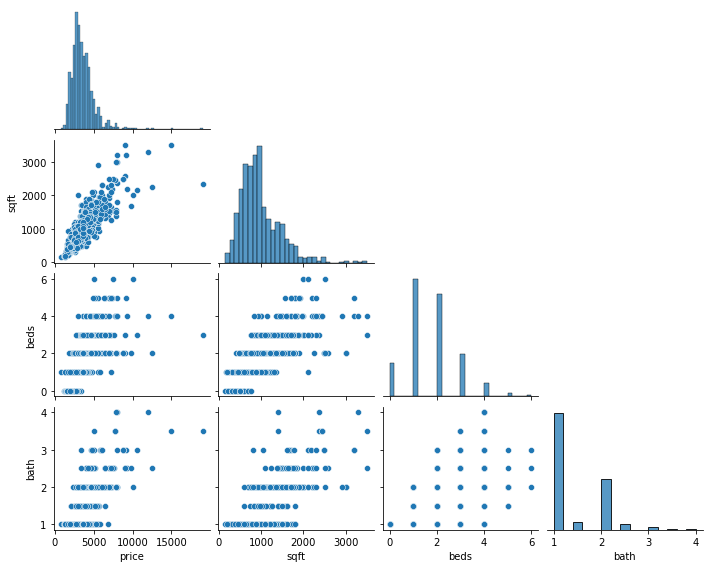

In [7]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(sf, height=2, aspect=1.25, corner=True);

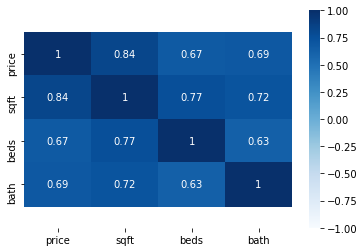

In [8]:
# correlation matrix
sns.heatmap(sf.corr(), cmap="Blues", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(sf.corr())+0.5, -0.5);

## Variable relationships with the target feature

### Unit Size (sqft) and Price

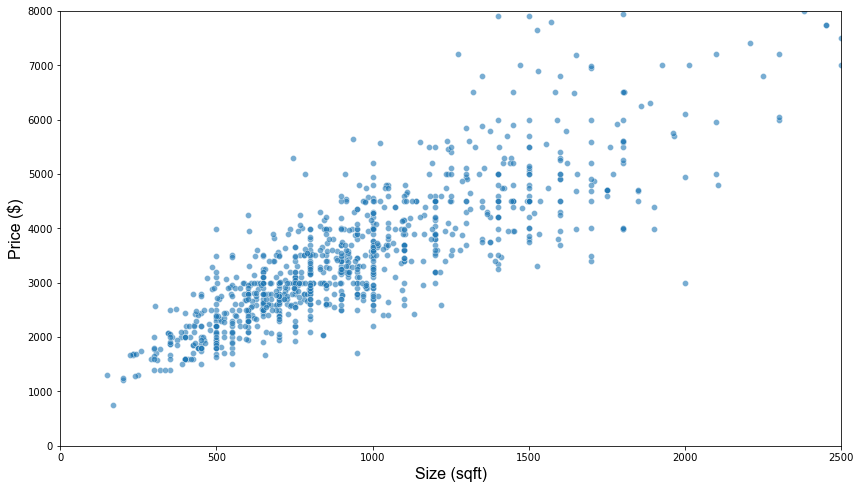

In [9]:
# sqft & Price
plt.figure(figsize=(14, 8))
sns.scatterplot(x=sf.sqft, y=sf.price, data=sf, alpha=.6, palette='Blues')


plt.xlim(0, 2500)
plt.ylim(0, 8000)

#plt.title('Unit Size (sqft) and Price', fontsize=20, fontname='Arial')
plt.xlabel('Size (sqft)', fontsize=16, fontname='Arial')
plt.ylabel('Price ($)', fontsize=16, fontname='Arial');
#plt.savefig('img/size_price.png')

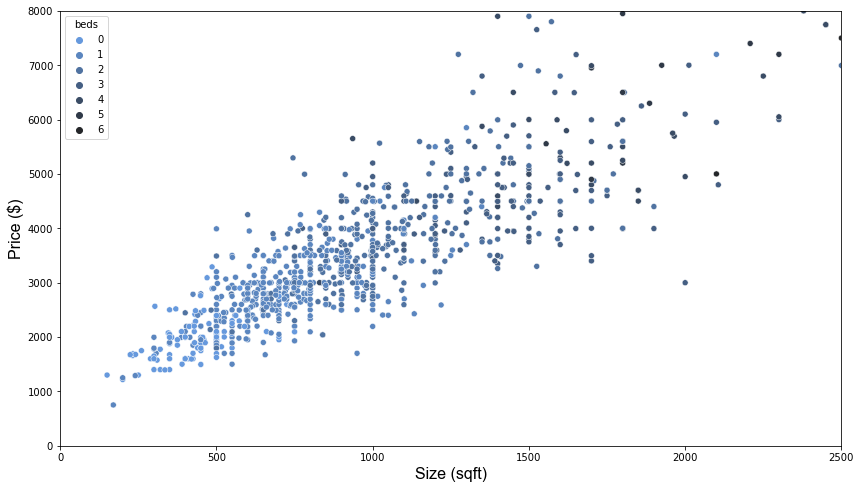

In [10]:
# sqft (and bedrooms) & Price 
plt.figure(figsize=(14, 8))
pal = sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.scatterplot(x=sf.sqft, y=sf.price, data=sf, hue=sf.beds, palette=pal)


plt.xlim(0, 2500)
plt.ylim(0, 8000)

#plt.title('Unit Size (sqft/brs) and Price', fontsize=20, fontname='Arial')
plt.xlabel('Size (sqft)', fontsize=16, fontname='Arial')
plt.ylabel('Price ($)', fontsize=16, fontname='Arial');
#plt.savefig('img/size_beds_price_.png')

### Bedrooms and Price

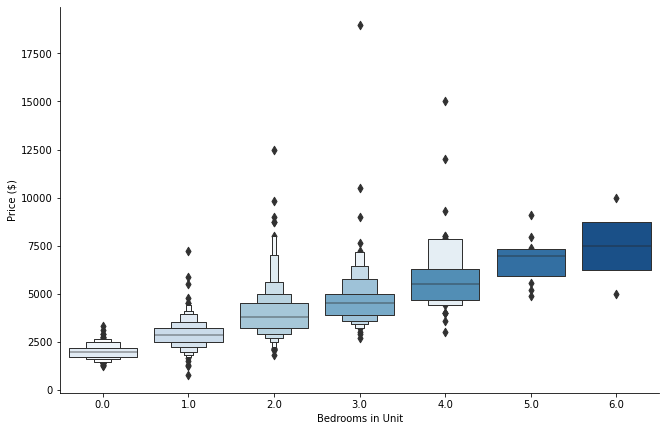

In [11]:
# Bedrooms & Price
catplot = sns.catplot(x='beds', y='price', data=sf, kind='boxen', palette='Blues')
catplot.set(xlabel='Bedrooms in Unit', ylabel='Price ($)')
catplot.fig.set_figwidth(10)
catplot.fig.set_figheight(6)
#plt.savefig('img/bed_catplot.png')

### Neighborhood and Price

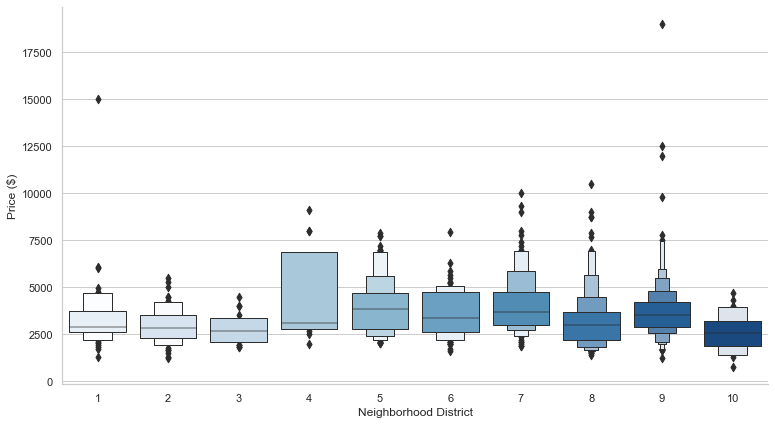

In [12]:
# Neighborhood & Price
order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

sns.set_theme(style="whitegrid")
catplot = sns.catplot(x='hood_district', y='price', data=sf, order=order, kind='boxen', palette='Blues');
catplot.set(xlabel='Neighborhood District', ylabel='Price ($)')
catplot.fig.set_figwidth(12)
catplot.fig.set_figheight(6)
#plt.savefig('img/hood_catplot.png')

### Laundry Facilities and Price

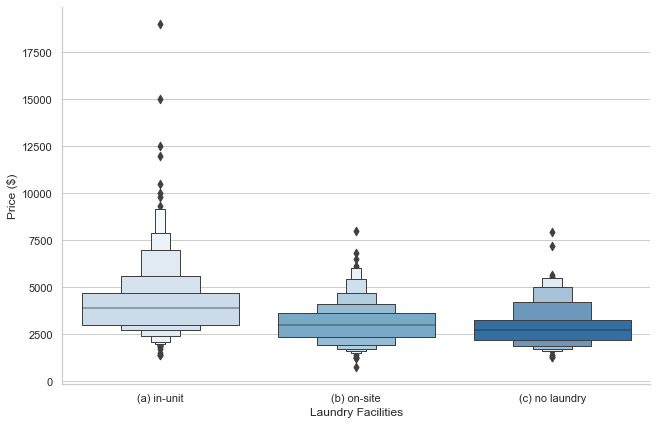

In [13]:
# Laundry & Price
sns.set_theme(style="whitegrid")
catplot = sns.catplot(x='laundry', y='price', data=sf, kind='boxen', order=['(a) in-unit', '(b) on-site', '(c) no laundry'], palette='Blues')
catplot.set(xlabel='Laundry Facilities', ylabel='Price ($)')
catplot.fig.set_figwidth(10)
catplot.fig.set_figheight(6)
#plt.savefig('img/laundry_catplot.png')

### Pets and Price

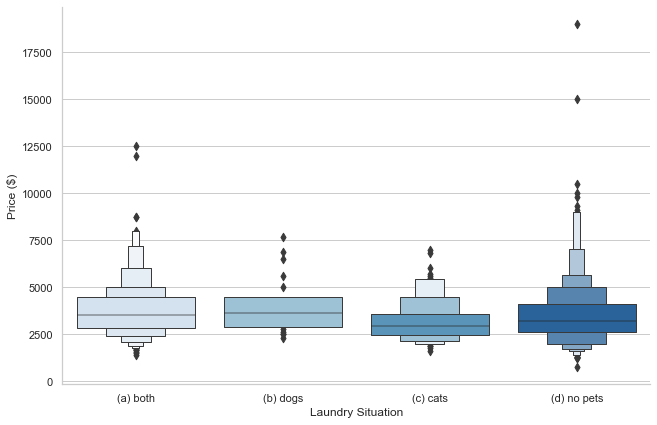

In [14]:
# Pets & Price
catplot = sns.catplot(x='pets', y='price', data=sf, kind='boxen', order=['(a) both', '(b) dogs', '(c) cats', '(d) no pets'], palette='Blues')
catplot.set(xlabel='Laundry Situation', ylabel='Price ($)')
catplot.fig.set_figwidth(10)
catplot.fig.set_figheight(6);

### Parking Situation and Price

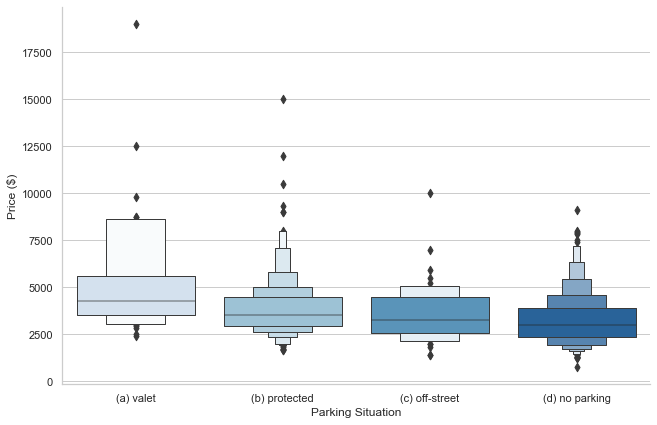

In [15]:
# Parking & Price
catplot = sns.catplot(x='parking', y='price', data=sf, kind='boxen', order=['(a) valet', '(b) protected', '(c) off-street', '(d) no parking'], palette='Blues')
catplot.set(xlabel='Parking Situation', ylabel='Price ($)')
catplot.fig.set_figwidth(10)
catplot.fig.set_figheight(6)
#plt.savefig('img/parking_catplot.png')

### Housing Type and Price

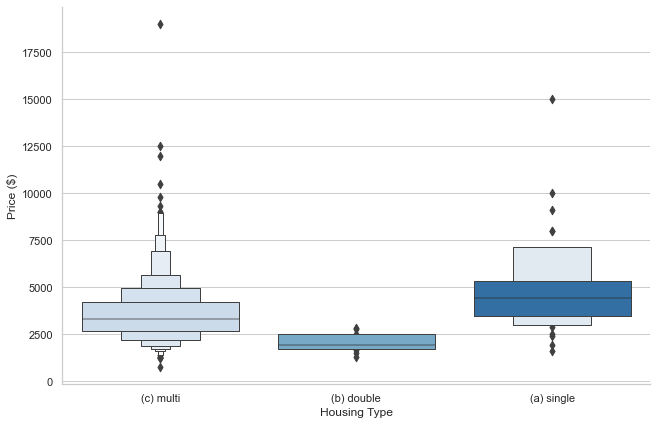

In [16]:
# Housing Type
catplot = sns.catplot(x='housing_type', y='price', data=sf, kind='boxen', order=['(c) multi', '(b) double', '(a) single'], palette='Blues')
catplot.set(xlabel='Housing Type', ylabel='Price ($)')
catplot.fig.set_figwidth(10)
catplot.fig.set_figheight(6);